## Implementing KNN on iris data set

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('iris.data', header=None, names=names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
x = np.array(iris.ix[:, 0:4])
y = np.array(iris['class'])

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Using the KNN model to predict the class, with K=3.

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)
#predicting the class
pred = knn.predict(X_test)
print(accuracy_score(y_test,pred))

0.94


Using thge KNN model to predict class, with K=4

In [17]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test,pred))

0.96


Using thge KNN model to predict class, with K=5

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test,pred))

0.96


### Parameter Tuning With Cross Validation

In [59]:
l=list(range(1,50))
# Collecting the set of odd integers for K, for tie-breakers.
neighbors=list(filter(lambda x: x % 2 != 0,l))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.9505555555555556,
 0.9505555555555556,
 0.9442424242424241,
 0.9709090909090909,
 0.9800000000000001,
 0.9800000000000001,
 0.9716666666666667,
 0.97,
 0.97,
 0.96,
 0.97,
 0.9516666666666665,
 0.9616666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9433333333333334,
 0.9322222222222223,
 0.9322222222222223,
 0.9305555555555556,
 0.9222222222222223,
 0.9322222222222223,
 0.9222222222222223,
 0.9205555555555556,
 0.8836868686868687]

The optimal number of neighbors is  9


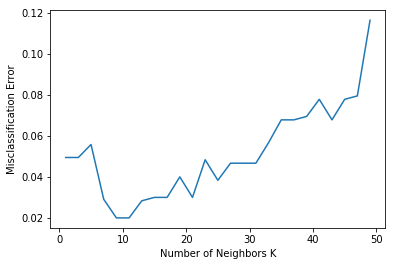

In [60]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is ", optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [45]:
optimal_k=1
for x in range(1,25):
    if (cv_scores[x]>cv_scores[optimal_k]):
        optimal_k=2*x-1
print ("The optimal number of neighbors is",optimal_k)

The optimal number of neighbors is 5


## Writing KNN Code

In [54]:
def train(X_train, y_train):
    # to store values of train data
    return

In [55]:
def predict(X_train, y_train, x_test, k):
    distances = []
    targets = []
    for i in range(len(X_train)):
        # to compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        distances.append([distance, i])

    # sorting the list
    distances = sorted(distances)

    # make a list of the k neighbours' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    return Counter(targets).most_common(1)[0][0]

In [56]:
def KNN(X_train, y_train, X_test, predictions, k):
    train(X_train, y_train)
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

In [57]:
predictions = []

KNN(X_train, y_train, X_test, predictions, 7)
predictions = np.asarray(predictions)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print('\nThe accuracy of our classifier is ', accuracy*100)


The accuracy of our classifier is  96.0
